In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

c:\users\lt5420\appdata\local\programs\python\python37\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [38]:
out_1 = pd.read_csv('1-out.txt', sep=' ')

Text(0.5,1,'')

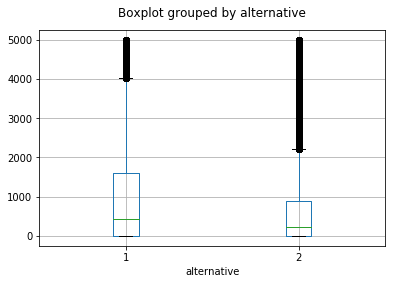

In [39]:
out_1.loc[out_1['time'] < 5000].boxplot(by='alternative',column='time').set_title('')

C:\Users\LT5420\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribucion de tiempo de instruccion')

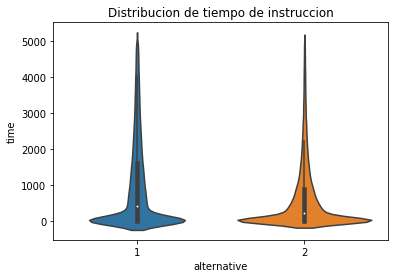

In [56]:
sns.violinplot(data=out_1.loc[out_1['time'] < 5000], x='alternative', y='time').set_title('Distribucion de tiempo de instruccion')

In [42]:
out_1.groupby('alternative').describe()

time                                                \
                count         mean          std       min       25%   
alternative                                                           
1            100000.0  1302.995252  1873.970410  0.000001  0.047418   
2            100000.0   715.045021  1170.456183  0.000002  0.046514   

                                                    
                    50%          75%           max  
alternative                                         
1            532.364344  1910.960593  25715.458612  
2            229.691345   927.187538  19619.025608

In [50]:
out_4 = pd.read_csv('4-out.txt', sep=' ')

Text(0.5,1,'')

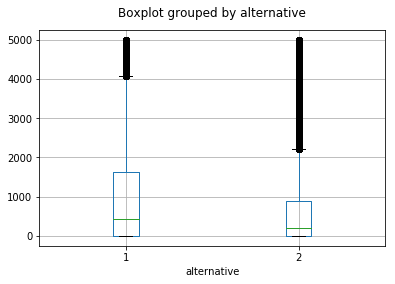

In [51]:
out_4.loc[out_4['time'] < 5000].boxplot(by='alternative',column='time').set_title('')

C:\Users\LT5420\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribucion de tiempo de instruccion')

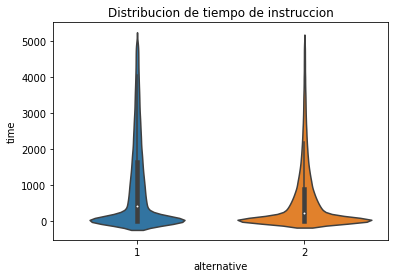

In [55]:
sns.violinplot(data=out_4.loc[out_4['time'] < 5000], x='alternative', y='time').set_title('Distribucion de tiempo de instruccion')

In [53]:
out_4.groupby('alternative').describe()

time                                                    \
                count         mean          std           min       25%   
alternative                                                               
1            100000.0  1303.559910  1871.175629  5.260034e-09  0.046914   
2            100000.0   709.036056  1163.832222  4.174923e-07  0.046664   

                                                    
                    50%          75%           max  
alternative                                         
1            526.413181  1919.971693  23210.843434  
2            226.371591   926.720147  17386.005068

In [18]:
import numpy as np
import simpy as sp
import pandas as pd
import matplotlib.pyplot as mp
import math



def aumenta(i, j):
	global N
	M = N-1
	global p
	permutations = math.factorial(M) / math.factorial(M - (j-i))
	combinations = permutations / math.factorial(j-i)
	return (combinations) * (p**(j-i)) * ((1-p)**(M-(j-i)))

def disminuye(i, j):
	global N
	sumatoria = 0
	for z in range(i,N):
		sumatoria += aumenta(i, z)

	return (1 - sumatoria) / (i)

N = 51
p = 0.7
array = np.zeros((N,N))

for i in range(N):
	for j in range(N):
		if (j >= i):
			array[i][j] = aumenta(i, j)
		else:
			array[i][j] = disminuye(i, j)
			#array[i][j] = array[i][j]

#print(array)
#Punto b			
values = [i for i in range(N)]
#Inicio vacio
actual_clients = 0
clients = [[0,0]]
for i in range(1,100):
	actual_clients = np.random.choice(values, p=array[actual_clients])
	clients.append([i, actual_clients])

In [6]:
clients = pd.DataFrame(clients)
clients.columns = ['step','clients']

Text(0.5,1,'Clientes por tiempo')

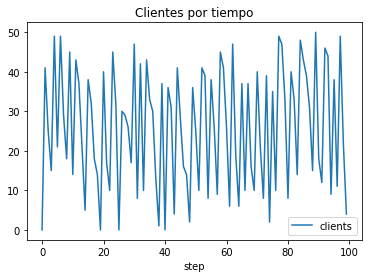

In [9]:
plot = clients.plot(x='step',y='clients')
plot.set_title('Clientes por step')

''

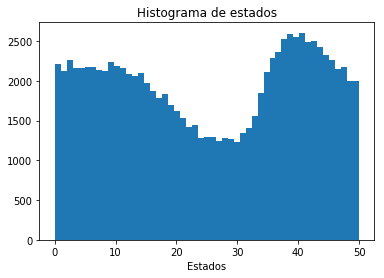

In [23]:
actual_clients = 0
clients = [[0,0]]
for i in range(1,100000):
	actual_clients = np.random.choice(values, p=array[actual_clients])
	clients.append([i, actual_clients])

clients = pd.DataFrame(clients)
clients.columns = ['step','clients']
mp.figure()
mp.hist(clients['clients'], bins=51)
mp.title('Histograma de estados')
mp.xlabel('Estados')
;